In [29]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [4]:
df = pd.read_csv('SupplyChain.csv')
df.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,masks,sanitizers
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,951,882
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,840,4944
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,997,1001
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,861,2287
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,633,1649


In [5]:
df.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,masks,sanitizers
5277,5/30/2020,952,36,394,NaN,Punjab,Lahore,951,678
5278,5/31/2020,1184,22,120,NaN,Punjab,Lahore,776,4491
5279,6/1/2020,1610,43,95,NaN,Punjab,Lahore,663,588
5280,6/2/2020,1639,30,353,NaN,Punjab,Lahore,658,1784
5281,6/3/2020,1615,37,243,NaN,Punjab,Lahore,734,1001


### Reading simple Statistics

In [6]:
df.describe()

,Cases,Deaths,Recovered,masks,sanitizers
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,24.691594,0.503976,5.857062,747.939796,2745.310299
std,104.527860,2.231975,45.607904,146.395726,1301.353363
min,0.000000,0.000000,-2.000000,500.000000,500.000000
25%,1.000000,0.000000,0.000000,620.000000,1602.250000
50%,2.000000,0.000000,0.000000,745.000000,2738.000000
75%,9.000000,0.000000,1.000000,877.000000,3880.750000
max,1639.000000,43.000000,1431.000000,999.000000,4998.000000


In [8]:
print(f"total numbers of Sanitizers sold ===> {df['sanitizers'].sum()}")
print(f"total numbers of Sanitizers sold ===> {df['masks'].sum()}")

total numbers of Sanitizers sold ===> 14500729
total numbers of Sanitizers sold ===> 3950618


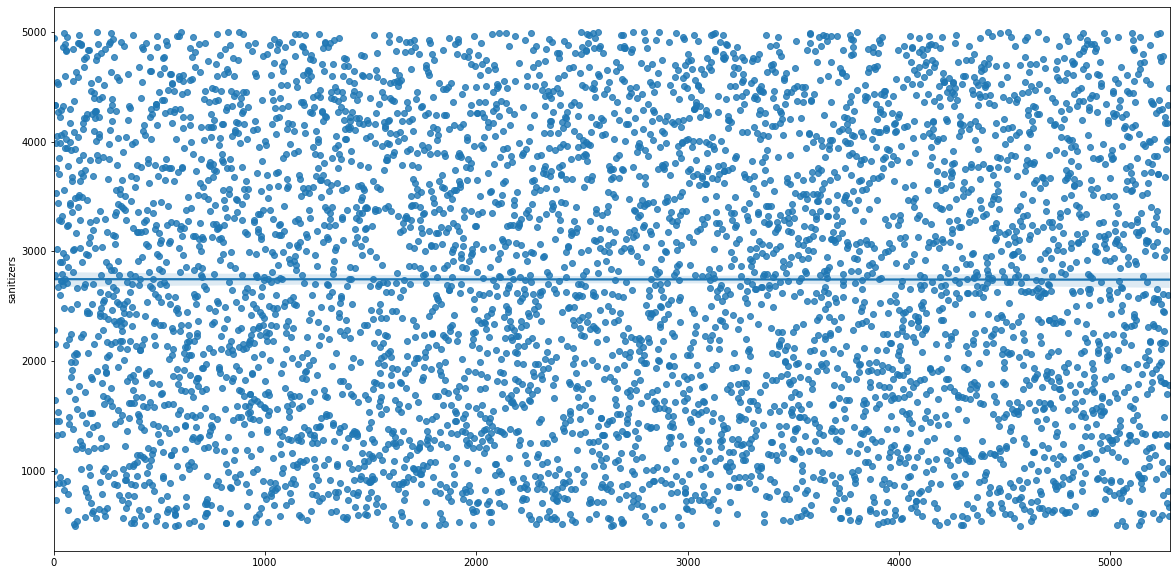

In [25]:
fig = plt.figure(figsize = (20,10))
sns.regplot(x =[i for i in range(len(df['Date']))],y = df['sanitizers'])

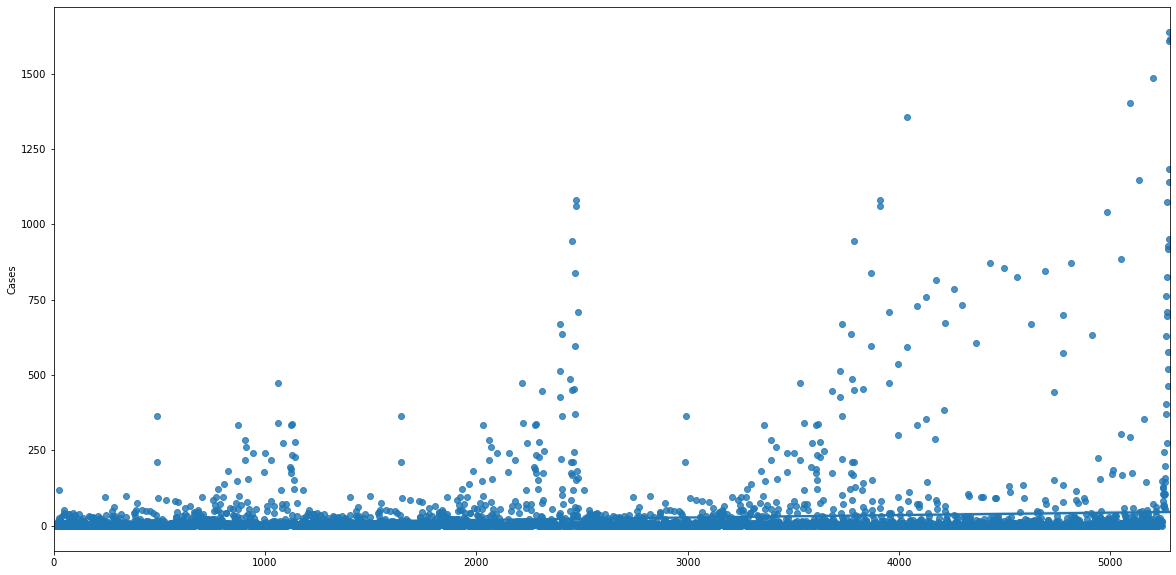

In [28]:
fig = plt.figure(figsize = (20,10))
sns.regplot(x =[i for i in range(len(df['Date']))],y = df['Cases'])

In [87]:
prov = df.groupby(['Province']).sum()
prov

,Cases,Deaths,Recovered,masks,sanitizers
Province,,,,,
Azad Jummu Kashmir,437,6,112,82815,278575
Baluchistan,8075,87,2359,141371,510017
Federal Administration Tribal Area,159,3,45,82860,323345
Gilgit-Baltistan,1568,31,797,250812,939684
Islamabad Capital Territory,2949,34,411,98293,363097
Khyber Pakhtunkhwa,16889,794,3320,1791340,6616852
Punjab,48513,865,5566,721156,2654580
Sindh,50287,833,18248,752482,2716215
islamabad Capital Territory,1538,9,79,24616,79292


### Masks and Sanitizzers sold with respect to Province

Text(0, 0.5, 'Total Masks sold 10e6')

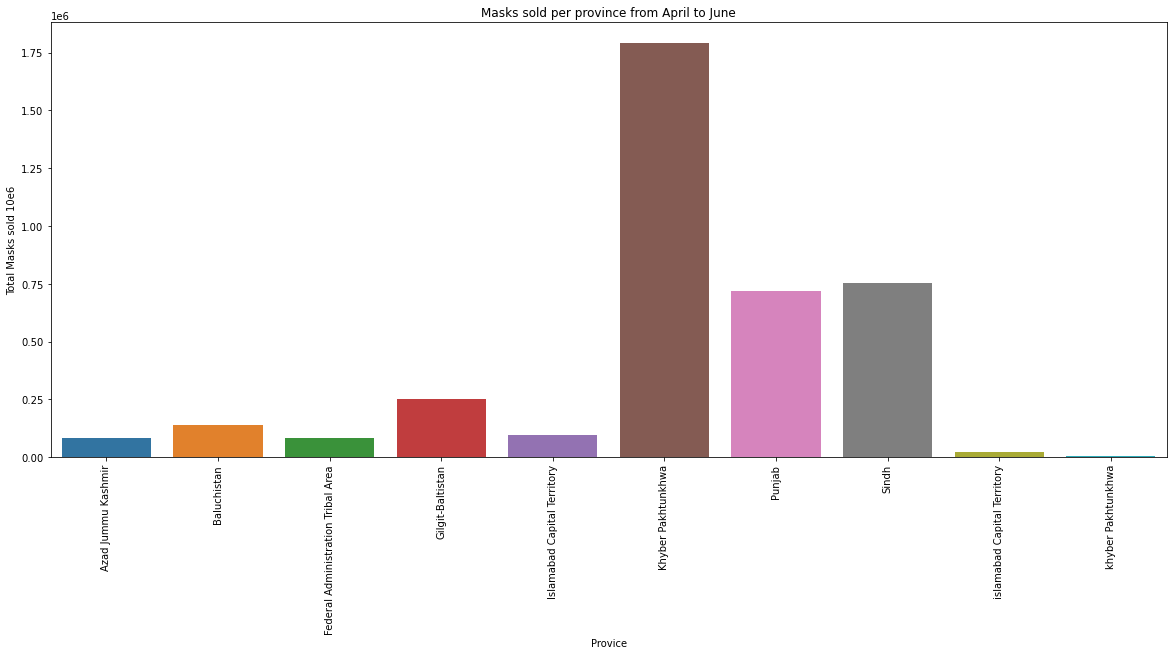

In [71]:
figure = plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
plt.title('Masks sold per province from April to June')
sns.barplot(x = prov.index,y = prov['masks'])
plt.xlabel('Provice')
plt.ylabel('Total Masks sold 10e6')


Text(0, 0.5, 'Total Sanitizers sold 10e6')

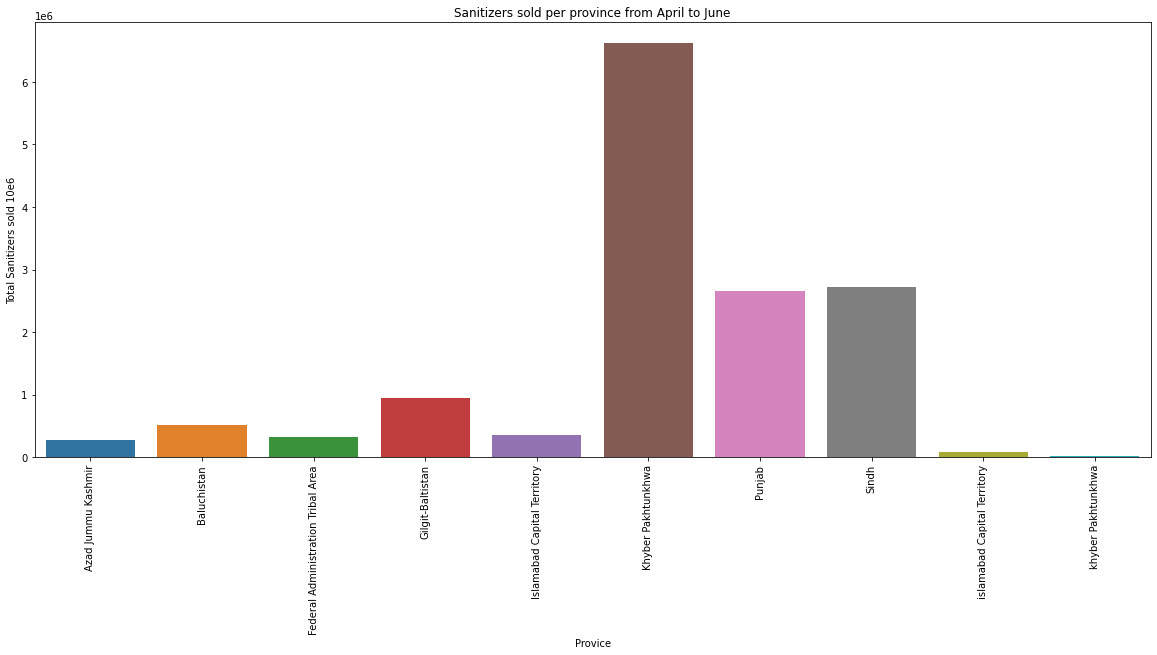

In [73]:
figure = plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
plt.title('Sanitizers sold per province from April to June')
sns.barplot(x = prov.index,y = prov['sanitizers'])
plt.xlabel('Provice')
plt.ylabel('Total Sanitizers sold 10e6')


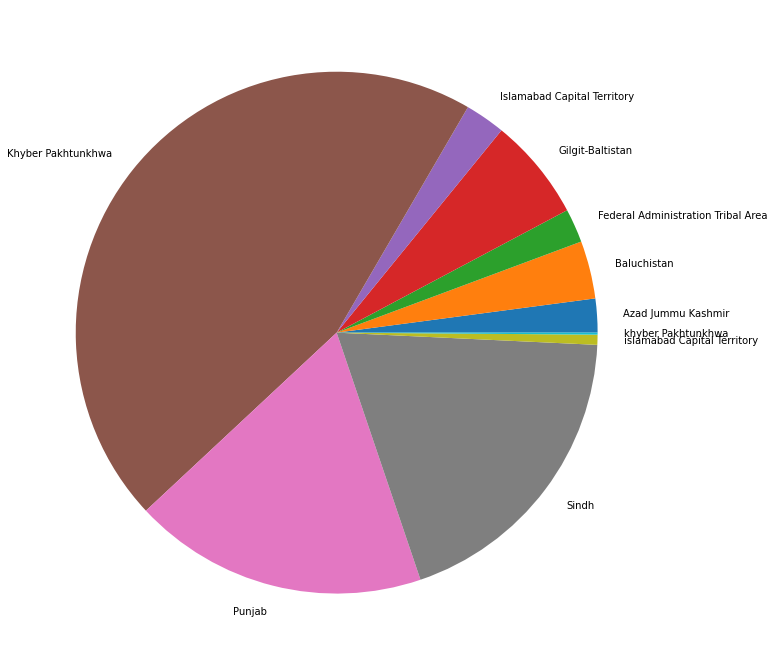

In [91]:
fig = plt.figure(figsize=(12,12))
plt.pie(x = prov['masks'],labels = prov.index);

### Masks and Sanitizers sold with respect to Cities

In [82]:
city = df.groupby(['City']).sum()
city

,Cases,Deaths,Recovered,masks,sanitizers
City,,,,,
Abbottabad,350,20,74,67624,229022
Astore,97,16,66,26926,112776
Attock,45,0,0,6440,17828
Badin,84,4,13,24609,101682
Bahawal Nagar,63,0,12,15749,49929
...,...,...,...,...,...
Trarkhel,3,0,0,2156,5730
Umerkot,17,1,3,16206,49184
Vehari,216,0,18,15252,55398


Text(0, 0.5, 'Total Masks sold 10e6')

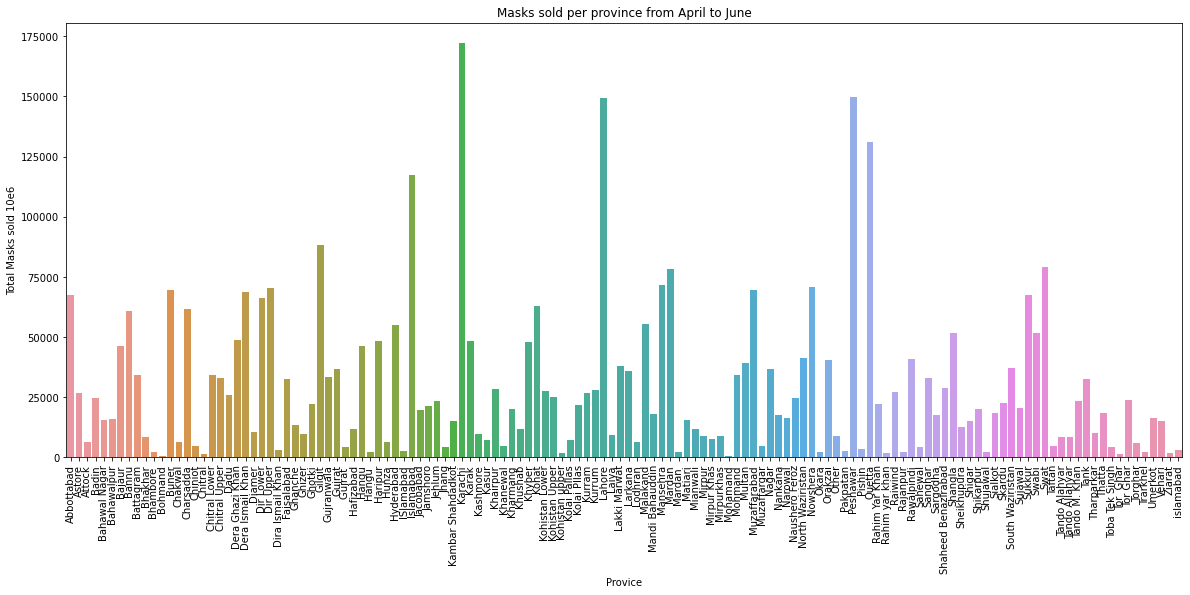

In [81]:
figure = plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
plt.title('Masks sold per province from April to June')
sns.barplot(x = prov.index,y = prov['masks'])
plt.xlabel('Provice')
plt.ylabel('Total Masks sold 10e6')


Text(0, 0.5, 'Total Sanitizers sold 10e6')

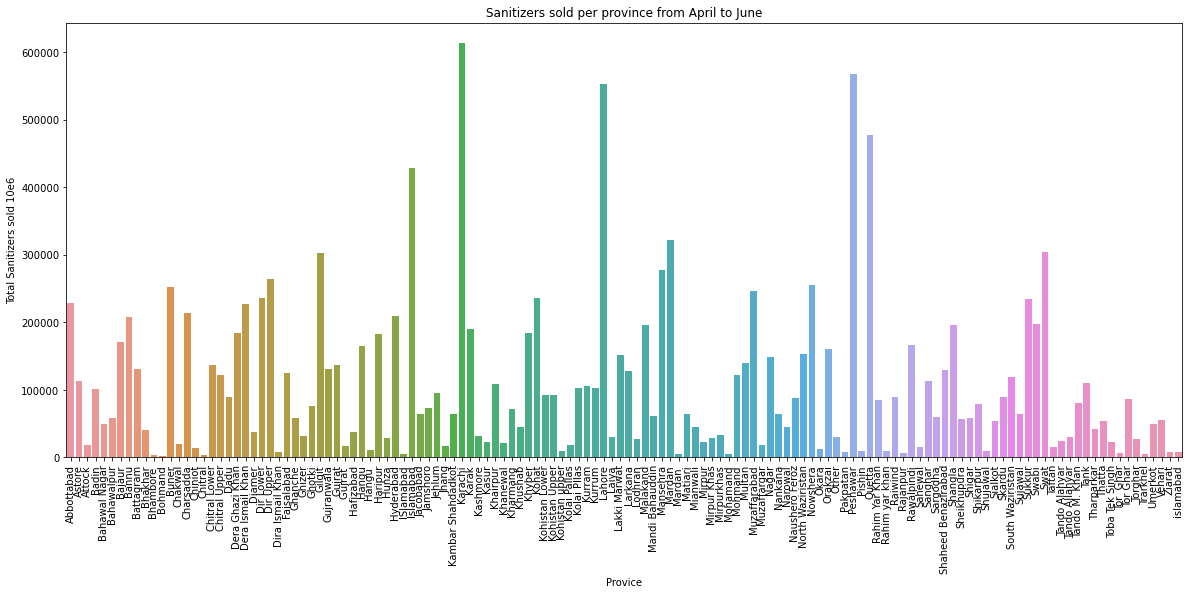

In [80]:
figure = plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
plt.title('Sanitizers sold per province from April to June')
sns.barplot(x = city.index,y = prov['sanitizers'])
plt.xlabel('Provice')
plt.ylabel('Total Sanitizers sold 10e6')